In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import rcParams
from tqdm import tqdm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [151]:
df_scaling = pd.read_csv('Total_dataset/total_dataset(rescaling)(2).csv').iloc[:, 2:]
df_preproc = pd.read_csv('Total_dataset/total_dataset(_preproc+index)(3).csv')
df_vae_left = pd.read_csv('복원데이터8개(0919)/CVAE_recon_df_0_L_38(M_06).csv')
df_vae_right = pd.read_csv('복원데이터8개(0919)/CVAE_recon_df_1_R_42(BM_06).csv')

In [152]:
#position state가 1일 때, now_index는 얼굴 앞, next_index는 왼쪽/오른쪽 밑

#### 각 클래스 별 잘 나왔던 인덱스 값이라 원하는 클래스에 해당하는 코드 주석 풀고 사용하면 됨

In [170]:
#class = 0
now_index=123
next_index=134

# #class = 11
# now_index=13325
# next_index=13341

# #class = 15
# now_index=35626
# next_index=35635

# #class = 21
# now_index=38178
# next_index=38199

# #class = 26
# now_index=49929
# next_index=49954

# #class = 31
# now_index=76376
# next_index=76391

# #class = 32
# now_index=80924
# next_index=80941

In [171]:
df_vae_left = df_vae_left[df_vae_left['class']==0]
df_vae_right = df_vae_right[df_vae_right['class']==0]

# df_vae_left = df_vae_left[df_vae_left['class']==11]
# df_vae_right = df_vae_right[df_vae_right['class']==11]

# df_vae_left = df_vae_left[df_vae_left['class']==15]
# df_vae_right = df_vae_right[df_vae_right['class']==15]

# df_vae_left = df_vae_left[df_vae_left['class']==21]
# df_vae_right = df_vae_right[df_vae_right['class']==21]

# df_vae_left = df_vae_left[df_vae_left['class']==26]
# df_vae_right = df_vae_right[df_vae_right['class']==26]

# df_vae_left = df_vae_left[df_vae_left['class']==31]
# df_vae_right = df_vae_right[df_vae_right['class']==31]

# df_vae_left = df_vae_left[df_vae_left['class']==32]
# df_vae_right = df_vae_right[df_vae_right['class']==32]

In [172]:
len(df_vae_right)

95

## Scaling 좌표

In [166]:
#position state 0
df_x_0 = df_scaling.filter(regex='_x').iloc[now_index, :]
df_y_0 = df_scaling.filter(regex='_y').iloc[now_index, :]
df_z_0 = df_scaling.filter(regex='_z').iloc[now_index, :]

#position state 1
df_x_1 = df_scaling.filter(regex='_x').iloc[next_index, :]
df_y_1 = df_scaling.filter(regex='_y').iloc[next_index, :]
df_z_1 = df_scaling.filter(regex='_z').iloc[next_index, :]

#scaling x, y좌표 dataframe
df_x_s_0 = pd.DataFrame(df_x_0.values, columns=[0])
df_y_s_0 = pd.DataFrame(df_y_0.values, columns=[1])
df_z_s_0 = pd.DataFrame(df_z_0.values, columns=[2])

df_x_s_1 = pd.DataFrame(df_x_1.values, columns=[0])
df_y_s_1 = pd.DataFrame(df_y_1.values, columns=[1])
df_z_s_1 = pd.DataFrame(df_z_1.values, columns=[2])

#scaling x, y 좌표 concat dataframe
df_x_y_0 = pd.concat([df_x_s_0, df_y_s_0], axis=1)
np.ndarray(df_x_y_0)
df_x_y_1 = pd.concat([df_x_s_1, df_y_s_1], axis=1)
np.ndarray(df_x_y_1)

print('position state 0번 좌표 shape: ', df_x_y_0.shape, '\nposition state 1번 좌표 shape: ', df_x_y_1.shape)

position state 0번 좌표 shape:  (33, 2) 
position state 1번 좌표 shape:  (33, 2)


In [167]:
#position=0
df_left_eyes_0= pd.concat([df_x_y_0.iloc[:1,:], df_x_y_0.iloc[1:4,:],df_x_y_0.iloc[7:8,:]])
df_right_eyes_0= pd.concat([df_x_y_0.iloc[:1,:], df_x_y_0.iloc[4:7,:],df_x_y_0.iloc[8:9,:]])

df_left_hand_0= pd.concat([df_x_y_0.iloc[15:16,:], df_x_y_0.iloc[21:22,:]])
df_right_hand_0= pd.concat([df_x_y_0.iloc[16:17,:], df_x_y_0.iloc[22:23,:]])

df_left_arm_0 = pd.concat([df_x_y_0.iloc[11:12,:],df_x_y_0.iloc[13:14,:],df_x_y_0.iloc[15:16,:],df_x_y_0.iloc[17:18,:],df_x_y_0.iloc[19:20,:]])
df_right_arm_0 = pd.concat([df_x_y_0.iloc[12:13,:],df_x_y_0.iloc[14:15,:],df_x_y_0.iloc[16:17,:],df_x_y_0.iloc[18:19,:],df_x_y_0.iloc[20:21,:]])

df_left_leg_0 = pd.concat([df_x_y_0.iloc[23:24,:],df_x_y_0.iloc[25:26,:],df_x_y_0.iloc[27:28,:],df_x_y_0.iloc[29:30,:],df_x_y_0.iloc[31:32,:]])
df_right_leg_0 = pd.concat([df_x_y_0.iloc[24:25,:],df_x_y_0.iloc[26:27,:],df_x_y_0.iloc[28:29,:],df_x_y_0.iloc[30:31,:],df_x_y_0.iloc[32:,:]])

df_left_shoulder_0= pd.concat([df_x_y_0.iloc[11:12,:],df_x_y_0.iloc[23:24,:]])
df_right_shoulder_0= pd.concat([df_x_y_0.iloc[12:13,:],df_x_y_0.iloc[24:25,:]])

df_left_foot_0= pd.concat([df_x_y_0.iloc[27:28,:],df_x_y_0.iloc[31:32,:]])
df_right_foot_0= pd.concat([df_x_y_0.iloc[28:29,:],df_x_y_0.iloc[32:,:]])


#position=1
df_left_eyes_1= pd.concat([df_x_y_1.iloc[:1,:], df_x_y_1.iloc[1:4,:],df_x_y_1.iloc[7:8,:]])
df_right_eyes_1= pd.concat([df_x_y_1.iloc[:1,:], df_x_y_1.iloc[4:7,:],df_x_y_1.iloc[8:9,:]])

df_left_hand_1= pd.concat([df_x_y_1.iloc[15:16,:], df_x_y_1.iloc[21:22,:]])
df_right_hand_1= pd.concat([df_x_y_1.iloc[16:17,:], df_x_y_1.iloc[22:23,:]])

df_left_arm_1 = pd.concat([df_x_y_1.iloc[11:12,:],df_x_y_1.iloc[13:14,:],df_x_y_1.iloc[15:16,:],df_x_y_1.iloc[17:18,:],df_x_y_1.iloc[19:20,:]])
df_right_arm_1 = pd.concat([df_x_y_1.iloc[12:13,:],df_x_y_1.iloc[14:15,:],df_x_y_1.iloc[16:17,:],df_x_y_1.iloc[18:19,:],df_x_y_1.iloc[20:21,:]])

df_left_leg_1 = pd.concat([df_x_y_1.iloc[23:24,:],df_x_y_1.iloc[25:26,:],df_x_y_1.iloc[27:28,:],df_x_y_1.iloc[29:30,:],df_x_y_1.iloc[31:32,:]])
df_right_leg_1 = pd.concat([df_x_y_1.iloc[24:25,:],df_x_y_1.iloc[26:27,:],df_x_y_1.iloc[28:29,:],df_x_y_1.iloc[30:31,:],df_x_y_1.iloc[32:,:]])

df_left_shoulder_1= pd.concat([df_x_y_1.iloc[11:12,:],df_x_y_1.iloc[23:24,:]])
df_right_shoulder_1= pd.concat([df_x_y_1.iloc[12:13,:],df_x_y_1.iloc[24:25,:]])

df_left_foot_1= pd.concat([df_x_y_1.iloc[27:28,:],df_x_y_1.iloc[31:32,:]])
df_right_foot_1= pd.concat([df_x_y_1.iloc[28:29,:],df_x_y_1.iloc[32:,:]])

In [168]:
x_hand_0 = ([df_x_y_0.iloc[15:16,:1], df_x_y_0.iloc[21:22,:1]])
y_hand_0 = ([df_x_y_0.iloc[15:16,1:], df_x_y_0.iloc[21:22,1:]])

x_hand_0_min = (x_hand_0[0].values+x_hand_0[1].values)/len(x_hand_0)
y_hand_0_min = (y_hand_0[0].values+y_hand_0[1].values)/len(y_hand_0)

hand_0_min = (x_hand_0_min[0][0], y_hand_0_min[0][0])
print('position 0 x좌표 평균: ', x_hand_0_min, 'position 0 y좌표 평균: ', y_hand_0_min)


x_hand_1 = ([df_x_y_1.iloc[15:16,:1], df_x_y_1.iloc[21:22,:1]])
y_hand_1 = ([df_x_y_1.iloc[15:16,1:], df_x_y_1.iloc[21:22,1:]])

x_hand_1_min = (x_hand_1[0].values+x_hand_1[1].values)/len(x_hand_1)
y_hand_1_min = (y_hand_1[0].values+y_hand_1[1].values)/len(y_hand_1)

hand_1_min = (x_hand_1_min[0][0], y_hand_1_min[0][0])
print('position 1 x좌표 평균: ', x_hand_1_min, 'position 1 y좌표 평균: ', y_hand_1_min)

print('position 0 좌표 평균: ', hand_0_min)
print('position 1 좌표 평균: ', hand_1_min)

x_hand = (hand_0_min[0], hand_1_min[0])
y_hand = (-hand_0_min[1], -hand_1_min[1])

print(x_hand, y_hand)

position 0 x좌표 평균:  [[0.57142857]] position 0 y좌표 평균:  [[0.33980583]]
position 1 x좌표 평균:  [[0.34615385]] position 1 y좌표 평균:  [[0.45631068]]
position 0 좌표 평균:  (0.5714285714285714, 0.3398058252427185)
position 1 좌표 평균:  (0.34615384615384615, 0.4563106796116505)
(0.5714285714285714, 0.34615384615384615) (-0.3398058252427185, -0.4563106796116505)


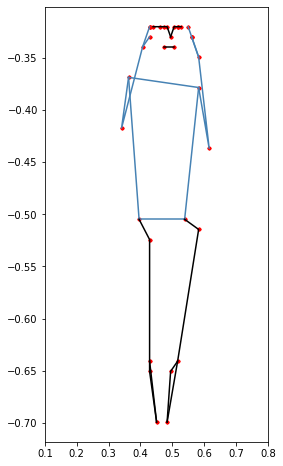

In [169]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0.1 ,0.8)

plt.plot(df_left_eyes_0.iloc[:,0], -df_left_eyes_0.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_0.iloc[:,0], -df_right_eyes_0.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_0.iloc[9:11,0], -df_x_y_0.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_0.iloc[:,0], -df_left_hand_0.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_0.iloc[:,0], -df_right_hand_0.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_0.iloc[:,0], -df_left_arm_0.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_0.iloc[:,0], -df_right_arm_0.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_0.iloc[11:13,0], -df_x_y_0.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_0.iloc[:,0], -df_left_shoulder_0.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_0.iloc[:,0], -df_right_shoulder_0.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_0.iloc[23:25,0], -df_x_y_0.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_0.iloc[:,0], -df_left_leg_0.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_0.iloc[:,0], -df_right_leg_0.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_0.iloc[:,0], -df_left_foot_0.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_0.iloc[:,0], -df_right_foot_0.iloc[:,1], color='black',zorder=2) #right foot


for i in range(df_x_y_0.shape[0]):
    plt.scatter(df_x_y_0.iloc[:, 0], -df_x_y_0.iloc[:, 1], alpha=0.1, color='red', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
# plt.plot(df_left_eyes_1.iloc[:,0], -df_left_eyes_1.iloc[:, 1], color='gray',zorder=2) #left eyes
# plt.plot(df_right_eyes_1.iloc[:,0], -df_right_eyes_1.iloc[:, 1], color='gray',zorder=2) #right eyes

# plt.plot(df_x_y_1.iloc[9:11,0], -df_x_y_1.iloc[9:11,1], color='gray',zorder=2) #mouth

# plt.plot(df_left_hand_1.iloc[:,0], -df_left_hand_1.iloc[:,1], color='royalblue',zorder=2) #left hand
# plt.plot(df_right_hand_1.iloc[:,0], -df_right_hand_1.iloc[:,1], color='royalblue',zorder=2) #right hand

# plt.plot(df_left_arm_1.iloc[:,0], -df_left_arm_1.iloc[:,1], color='royalblue',zorder=2) #left arm
# plt.plot(df_right_arm_1.iloc[:,0], -df_right_arm_1.iloc[:,1], color='royalblue',zorder=2) #right arm

# plt.plot(df_x_y_1.iloc[11:13,0], -df_x_y_1.iloc[11:13,1], color='royalblue',zorder=2) #shoulder
# plt.plot(df_left_shoulder_1.iloc[:,0], -df_left_shoulder_1.iloc[:,1], color='royalblue',zorder=2) #left shoulder
# plt.plot(df_right_shoulder_1.iloc[:,0], -df_right_shoulder_1.iloc[:,1], color='royalblue',zorder=2) #right shoulder

# plt.plot(df_x_y_1.iloc[23:25,0], -df_x_y_1.iloc[23:25,1], color='royalblue',zorder=2) #hip

# plt.plot(df_left_leg_1.iloc[:,0], -df_left_leg_1.iloc[:,1], color='gray',zorder=2) #left leg
# plt.plot(df_right_leg_1.iloc[:,0], -df_right_leg_1.iloc[:,1], color='gray',zorder=2) #right leg

# plt.plot(df_left_foot_1.iloc[:,0], -df_left_foot_1.iloc[:,1], color='gray',zorder=2) #left foot
# plt.plot(df_right_foot_1.iloc[:,0], -df_right_foot_1.iloc[:,1], color='gray',zorder=2) #right foot


# for i in range(df_x_y_1.shape[0]):
#     plt.scatter(df_x_y_1.iloc[:, 0], -df_x_y_1.iloc[:, 1], alpha=0.1, color='gray', s=7)
#     #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
# plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
# plt.scatter(hand_1_min[0], -hand_1_min[1], color='yellow', s=500)
# plt.plot(x_hand, y_hand, color='red')

plt.show()

## VAE 증강 전 운동량 데이터

In [93]:
df_x_preproc = df_preproc[df_preproc['now_index']==now_index].filter(regex='_x').values.tolist()
df_y_preproc = df_preproc[df_preproc['now_index']==now_index].filter(regex='_y').values.tolist()

df_xy_preproc = pd.DataFrame({0:df_x_preproc[0],1:df_y_preproc[0]})
df_xy_preproc.shape

(33, 2)

In [94]:
#position state 0 값에 운동량 데이터를 더해서 position state 1에 해당하는 좌표 값 생성
df_x_y_sum = df_x_y_0 + df_xy_preproc
df_x_y_sum.shape

(33, 2)

In [95]:
#position=0
df_left_eyes_sum= pd.concat([df_x_y_sum.iloc[:1,:], df_x_y_sum.iloc[1:4,:],df_x_y_sum.iloc[7:8,:]])
df_right_eyes_sum= pd.concat([df_x_y_sum.iloc[:1,:], df_x_y_sum.iloc[4:7,:],df_x_y_sum.iloc[8:9,:]])

df_left_hand_sum= pd.concat([df_x_y_sum.iloc[15:16,:], df_x_y_sum.iloc[21:22,:]])
df_right_hand_sum= pd.concat([df_x_y_sum.iloc[16:17,:], df_x_y_sum.iloc[22:23,:]])

df_left_arm_sum = pd.concat([df_x_y_sum.iloc[11:12,:],df_x_y_sum.iloc[13:14,:],df_x_y_sum.iloc[15:16,:],df_x_y_sum.iloc[17:18,:],df_x_y_sum.iloc[19:20,:]])
df_right_arm_sum = pd.concat([df_x_y_sum.iloc[12:13,:],df_x_y_sum.iloc[14:15,:],df_x_y_sum.iloc[16:17,:],df_x_y_sum.iloc[18:19,:],df_x_y_sum.iloc[20:21,:]])

df_left_leg_sum = pd.concat([df_x_y_sum.iloc[23:24,:],df_x_y_sum.iloc[25:26,:],df_x_y_sum.iloc[27:28,:],df_x_y_sum.iloc[29:30,:],df_x_y_sum.iloc[31:32,:]])
df_right_leg_sum = pd.concat([df_x_y_sum.iloc[24:25,:],df_x_y_sum.iloc[26:27,:],df_x_y_sum.iloc[28:29,:],df_x_y_sum.iloc[30:31,:],df_x_y_sum.iloc[32:,:]])

df_left_shoulder_sum= pd.concat([df_x_y_sum.iloc[11:12,:],df_x_y_sum.iloc[23:24,:]])
df_right_shoulder_sum= pd.concat([df_x_y_sum.iloc[12:13,:],df_x_y_sum.iloc[24:25,:]])

df_left_foot_sum= pd.concat([df_x_y_sum.iloc[27:28,:],df_x_y_sum.iloc[31:32,:]])
df_right_foot_sum= pd.concat([df_x_y_sum.iloc[28:29,:],df_x_y_sum.iloc[32:,:]])

In [96]:
x_hand_1_sum = ([df_x_y_sum.iloc[15:16,:1], df_x_y_sum.iloc[21:22,:1]])
y_hand_1_sum = ([df_x_y_sum.iloc[15:16,1:], df_x_y_sum.iloc[21:22,1:]])

x_hand_1_min_sum = (x_hand_1_sum[0].values+x_hand_1_sum[1].values)/len(x_hand_1_sum)
y_hand_1_min_sum = (y_hand_1_sum[0].values+y_hand_1_sum[1].values)/len(y_hand_1_sum)

hand_1_min_sum = (x_hand_1_min_sum[0][0], y_hand_1_min_sum[0][0])
print('position 1 x좌표 평균: ', x_hand_1_min_sum, 'position 1 y좌표 평균: ', y_hand_1_min_sum)

print('position 0 좌표 평균: ', hand_0_min)
print('position 1 좌표 평균: ', hand_1_min_sum)

x_hand = (hand_0_min[0], hand_1_min_sum[0])
y_hand_sum = (-hand_0_min[1], -hand_1_min_sum[1])

print(x_hand, y_hand)

position 1 x좌표 평균:  [[0.41208791]] position 1 y좌표 평균:  [[0.4368932]]
position 0 좌표 평균:  (0.5824175824175826, 0.325242718446602)
position 1 좌표 평균:  (0.4120879120879122, 0.43689320388349506)
(0.5824175824175826, 0.4120879120879122) (-0.325242718446602, -0.4368932038834952)


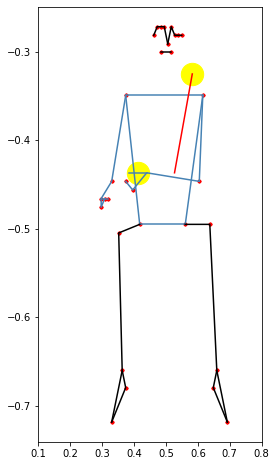

In [105]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0.1 ,0.8)

plt.plot(df_left_eyes_sum.iloc[:,0], -df_left_eyes_sum.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_sum.iloc[:,0], -df_right_eyes_sum.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_sum.iloc[9:11,0], -df_x_y_sum.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_sum.iloc[:,0], -df_left_hand_sum.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_sum.iloc[:,0], -df_right_hand_sum.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_sum.iloc[:,0], -df_left_arm_sum.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_sum.iloc[:,0], -df_right_arm_sum.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_sum.iloc[11:13,0], -df_x_y_sum.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum.iloc[:,0], -df_left_shoulder_sum.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum.iloc[:,0], -df_right_shoulder_sum.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_sum.iloc[23:25,0], -df_x_y_sum.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_sum.iloc[:,0], -df_left_leg_sum.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_sum.iloc[:,0], -df_right_leg_sum.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_sum.iloc[:,0], -df_left_foot_sum.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_sum.iloc[:,0], -df_right_foot_sum.iloc[:,1], color='black',zorder=2) #right foot

# Countour 겹쳐서
# plt.xlim(0.1 ,0.8)
#sns.kdeplot(data=xy, x="x", y="y", fill=True)

for i in range(df_x_y_sum.shape[0]):
    plt.scatter(df_x_y_sum.iloc[:, 0], -df_x_y_sum.iloc[:, 1], alpha=0.1, color='red', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
plt.scatter(hand_1_min_sum[0], -hand_1_min_sum[1], color='yellow', s=500)
plt.plot(x_hand, y_hand_sum, color='red')
    
plt.show()

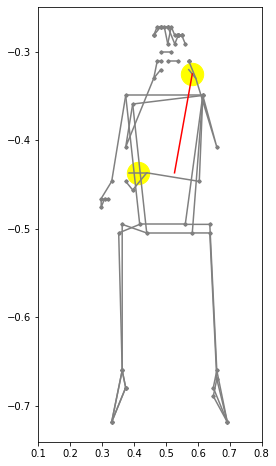

In [106]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0.1 ,0.8)

plt.plot(df_left_eyes_0.iloc[:,0], -df_left_eyes_0.iloc[:, 1], color='gray',zorder=2) #left eyes
plt.plot(df_right_eyes_0.iloc[:,0], -df_right_eyes_0.iloc[:, 1], color='gray',zorder=2) #right eyes

plt.plot(df_x_y_0.iloc[9:11,0], -df_x_y_0.iloc[9:11,1], color='gray',zorder=2) #mouth

plt.plot(df_left_hand_0.iloc[:,0], -df_left_hand_0.iloc[:,1], color='gray',zorder=2) #left hand
plt.plot(df_right_hand_0.iloc[:,0], -df_right_hand_0.iloc[:,1], color='gray',zorder=2) #right hand

plt.plot(df_left_arm_0.iloc[:,0], -df_left_arm_0.iloc[:,1], color='gray',zorder=2) #left arm
plt.plot(df_right_arm_0.iloc[:,0], -df_right_arm_0.iloc[:,1], color='gray',zorder=2) #right arm

plt.plot(df_x_y_0.iloc[11:13,0], -df_x_y_0.iloc[11:13,1], color='gray',zorder=2) #shoulder
plt.plot(df_left_shoulder_0.iloc[:,0], -df_left_shoulder_0.iloc[:,1], color='gray',zorder=2) #left shoulder
plt.plot(df_right_shoulder_0.iloc[:,0], -df_right_shoulder_0.iloc[:,1], color='gray',zorder=2) #right shoulder

plt.plot(df_x_y_0.iloc[23:25,0], -df_x_y_0.iloc[23:25,1], color='gray',zorder=2) #hip

plt.plot(df_left_leg_0.iloc[:,0], -df_left_leg_0.iloc[:,1], color='gray',zorder=2) #left leg
plt.plot(df_right_leg_0.iloc[:,0], -df_right_leg_0.iloc[:,1], color='gray',zorder=2) #right leg

plt.plot(df_left_foot_0.iloc[:,0], -df_left_foot_0.iloc[:,1], color='gray',zorder=2) #left foot
plt.plot(df_right_foot_0.iloc[:,0], -df_right_foot_0.iloc[:,1], color='gray',zorder=2) #right foot


for i in range(df_x_y_0.shape[0]):
    plt.scatter(df_x_y_0.iloc[:, 0], -df_x_y_0.iloc[:, 1], alpha=0.1, color='gray', s=7)
    
plt.plot(df_left_eyes_sum.iloc[:,0], -df_left_eyes_sum.iloc[:, 1], color='gray',zorder=2) #left eyes
plt.plot(df_right_eyes_sum.iloc[:,0], -df_right_eyes_sum.iloc[:, 1], color='gray',zorder=2) #right eyes

plt.plot(df_x_y_sum.iloc[9:11,0], -df_x_y_sum.iloc[9:11,1], color='gray',zorder=2) #mouth

plt.plot(df_left_hand_sum.iloc[:,0], -df_left_hand_sum.iloc[:,1], color='gray',zorder=2) #left hand
plt.plot(df_right_hand_sum.iloc[:,0], -df_right_hand_sum.iloc[:,1], color='gray',zorder=2) #right hand

plt.plot(df_left_arm_sum.iloc[:,0], -df_left_arm_sum.iloc[:,1], color='gray',zorder=2) #left arm
plt.plot(df_right_arm_sum.iloc[:,0], -df_right_arm_sum.iloc[:,1], color='gray',zorder=2) #right arm

plt.plot(df_x_y_sum.iloc[11:13,0], -df_x_y_sum.iloc[11:13,1], color='gray',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum.iloc[:,0], -df_left_shoulder_sum.iloc[:,1], color='gray',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum.iloc[:,0], -df_right_shoulder_sum.iloc[:,1], color='gray',zorder=2) #right shoulder

plt.plot(df_x_y_sum.iloc[23:25,0], -df_x_y_sum.iloc[23:25,1], color='gray',zorder=2) #hip

plt.plot(df_left_leg_sum.iloc[:,0], -df_left_leg_sum.iloc[:,1], color='gray',zorder=2) #left leg
plt.plot(df_right_leg_sum.iloc[:,0], -df_right_leg_sum.iloc[:,1], color='gray',zorder=2) #right leg

plt.plot(df_left_foot_sum.iloc[:,0], -df_left_foot_sum.iloc[:,1], color='gray',zorder=2) #left foot
plt.plot(df_right_foot_sum.iloc[:,0], -df_right_foot_sum.iloc[:,1], color='gray',zorder=2) #right foot

# Countour 겹쳐서
# plt.xlim(0.1 ,0.8)
# sns.kdeplot(data=xy, x="x", y="y", fill=True)

for i in range(df_x_y_sum.shape[0]):
    plt.scatter(df_x_y_sum.iloc[:, 0], -df_x_y_sum.iloc[:, 1], alpha=0.1, color='gray', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
plt.scatter(hand_1_min_sum[0], -hand_1_min_sum[1], color='yellow', s=500)
plt.plot(x_hand, y_hand_sum, color='red')
    
plt.show()


## VAE 증강 후 운동량 데이터(제일 잘 나온 인덱스 찾기)

### 왼쪽 방향(L)

In [107]:
# a = []
# b = []

# for i in range(len(df_vae_left)):
#     num=i
    
#     df_x_vae = df_vae_left.filter(regex='_x').iloc[i, :]
#     df_y_vae = df_vae_left.filter(regex='_y').iloc[i, :]
#     df_z_vae = df_vae_left.filter(regex='_z').iloc[i, :]

#     df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
#     df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
#     df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

#     df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
#     np.ndarray(df_x_y_vae)

#     df_x_y_sum_vae = df_x_y_1 + df_x_y_vae

#     #position=0
#     df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
#     df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

#     df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
#     df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

#     df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
#     df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

#     df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
#     df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

#     df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
#     df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

#     df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
#     df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

#     fig = plt.figure(figsize=(4, 8))
#     plt.xlim(0,1)
#     #     #plt.ylim(1,0)
    
#     plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
#     plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

#     plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

#     plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
#     plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

#     plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
#     plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

#     plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
#     plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
#     plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

#     plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

#     plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
#     plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

#     plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
#     plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot
    
#     plt.title(i)
    
#     a.append(df_x_y_sum_vae[0])
#     b.append(-df_x_y_sum_vae[1])

#     for j in range(df_x_y_sum_vae.shape[0]):
#         plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
#         #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)

### 오른쪽 방향(R)

C:\Users\KangMinJeong\AppData\Local\Temp\ipykernel_23132\373754112.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 8))


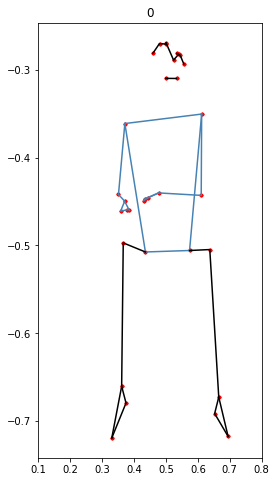

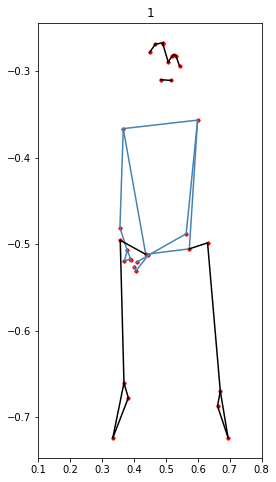

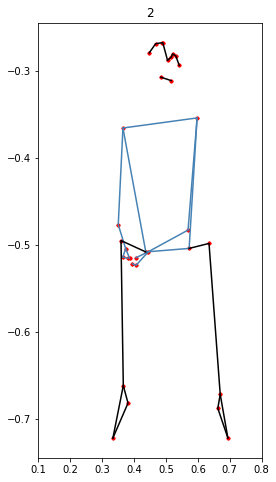

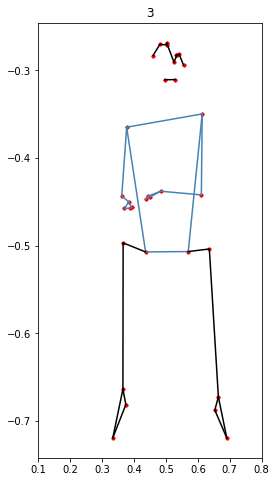

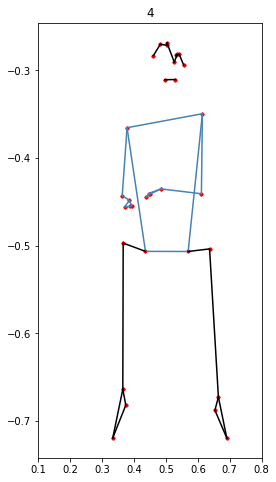

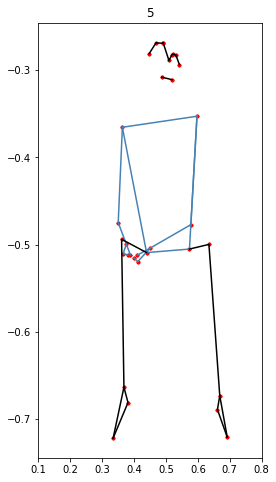

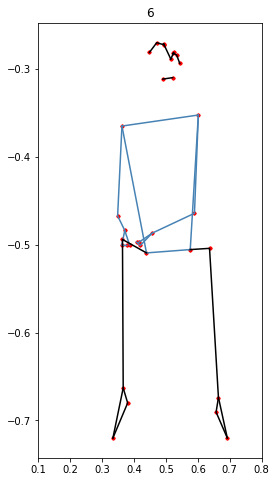

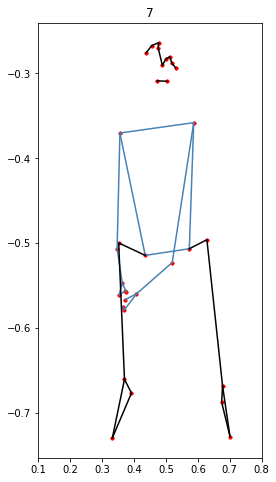

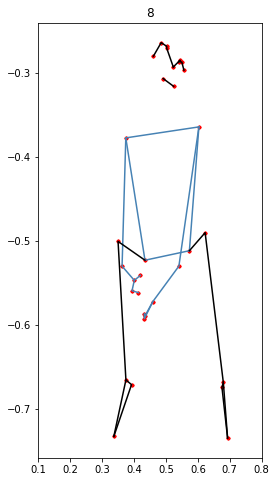

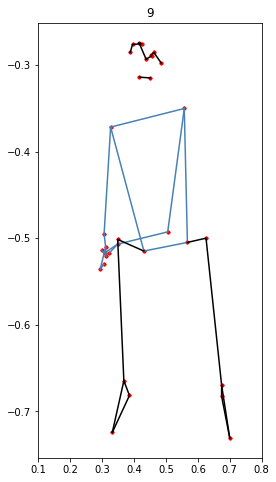

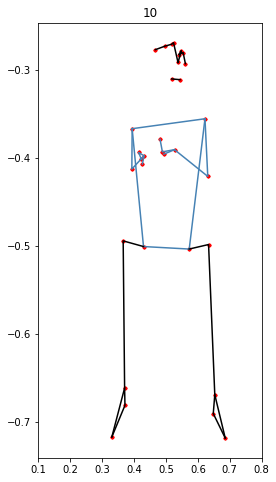

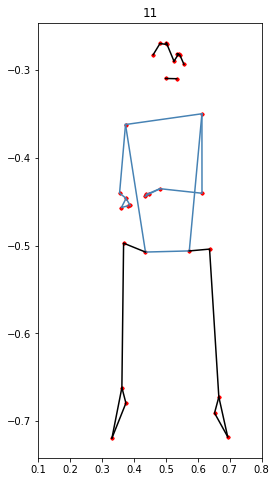

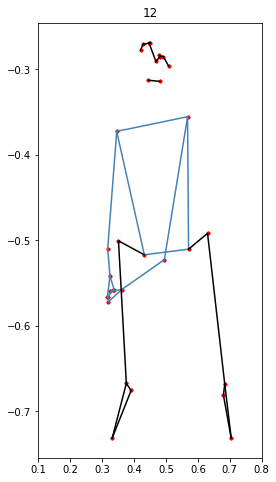

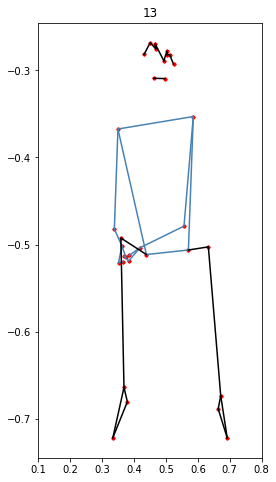

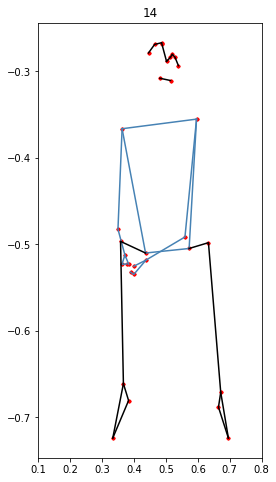

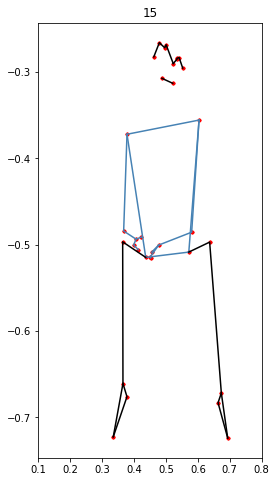

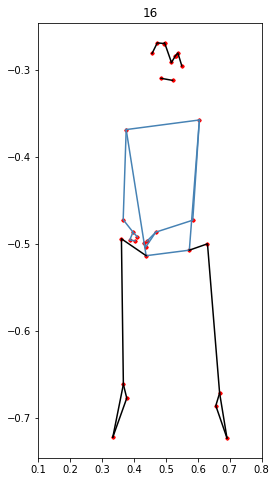

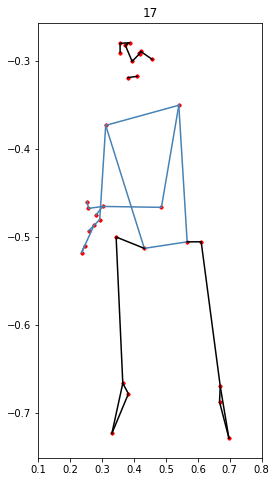

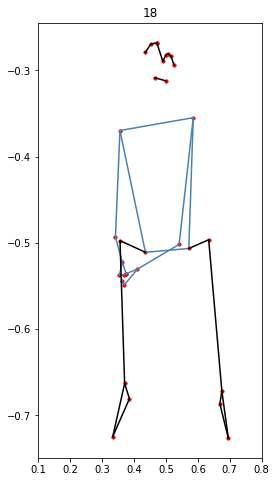

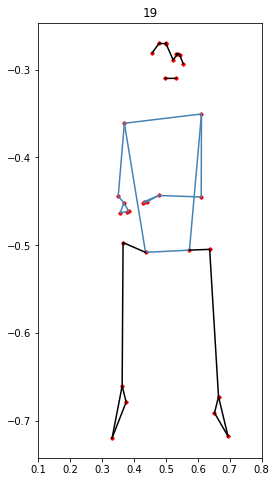

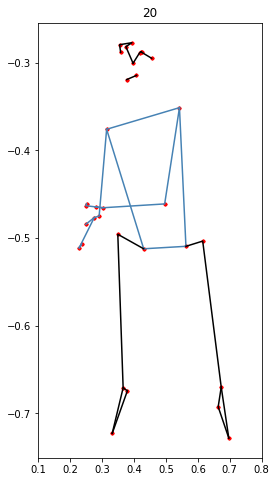

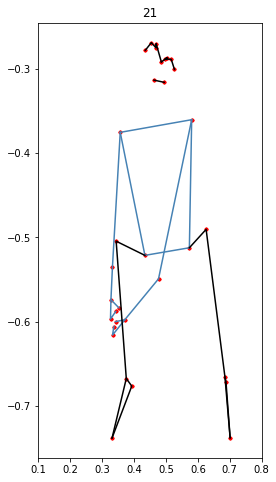

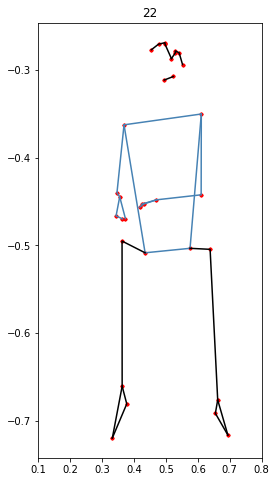

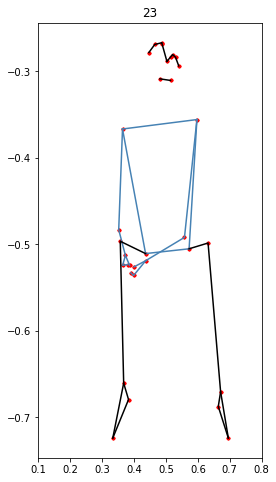

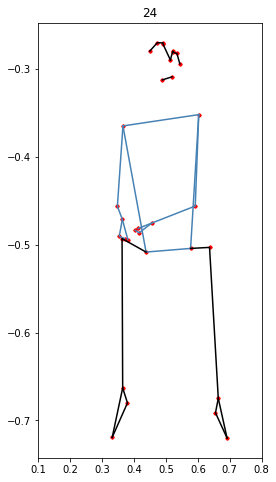

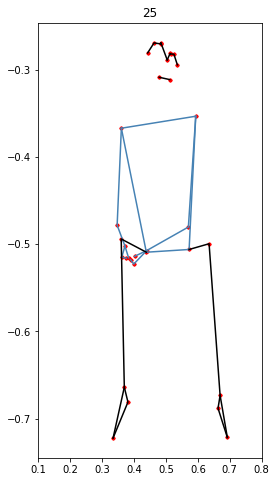

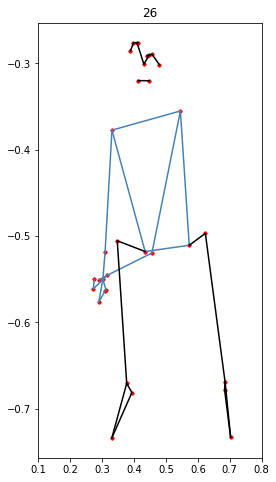

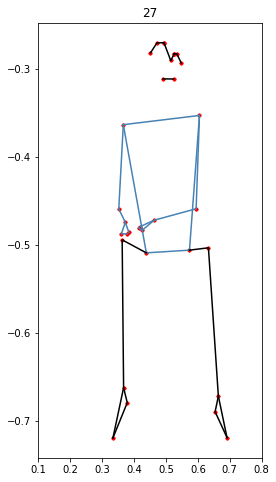

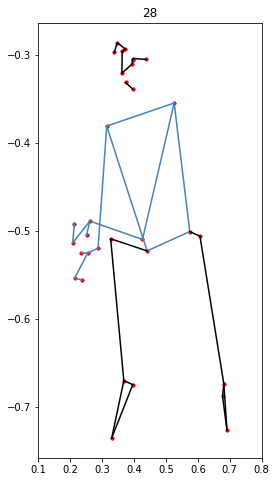

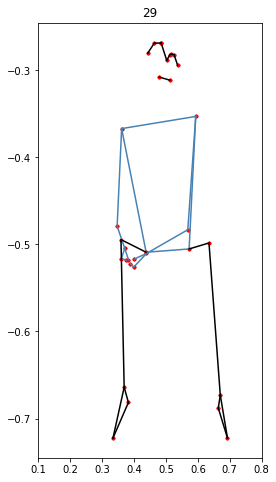

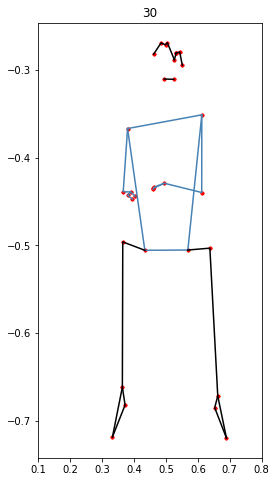

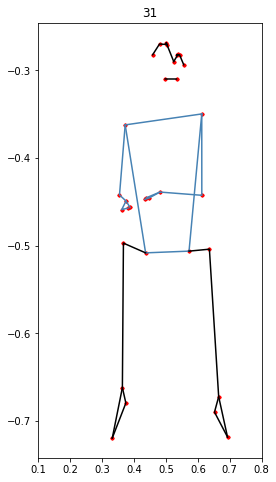

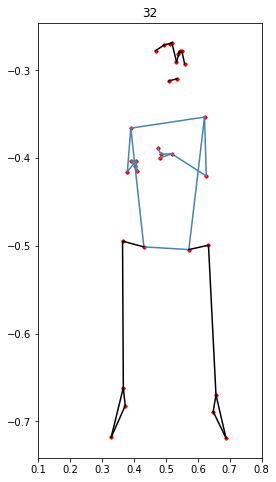

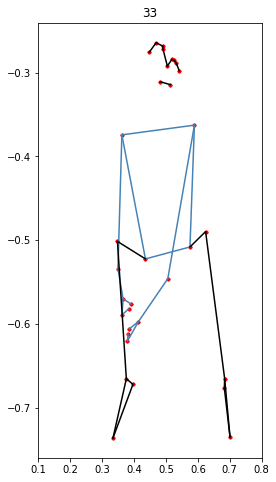

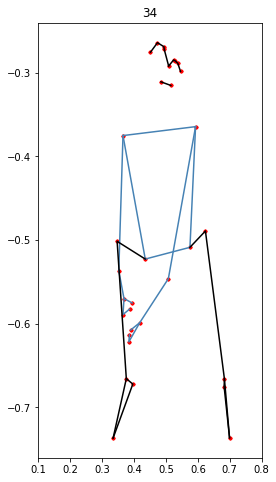

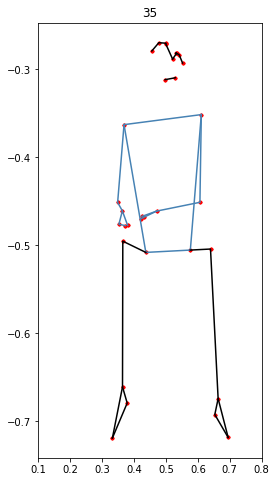

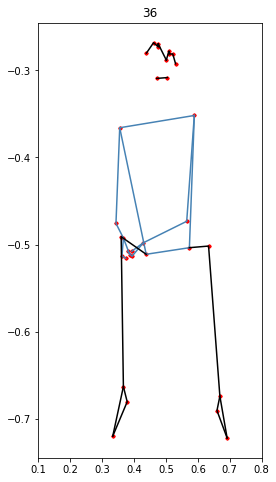

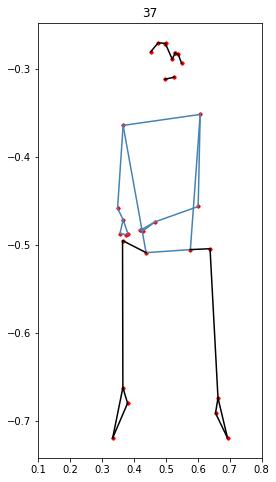

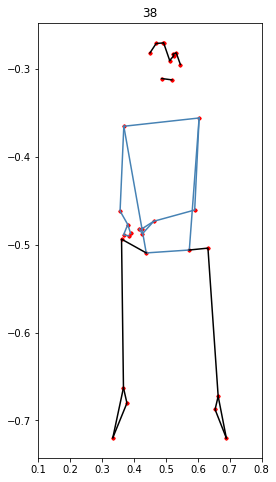

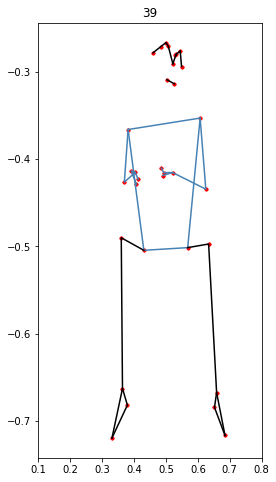

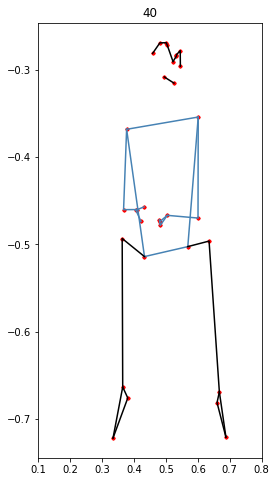

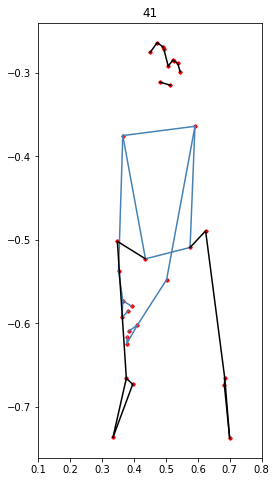

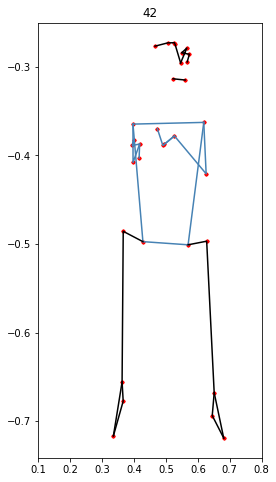

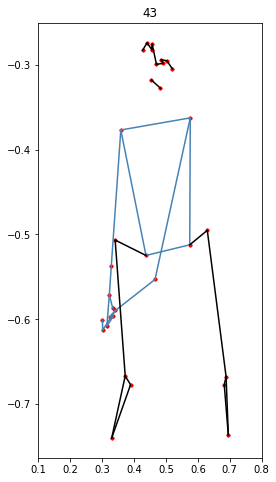

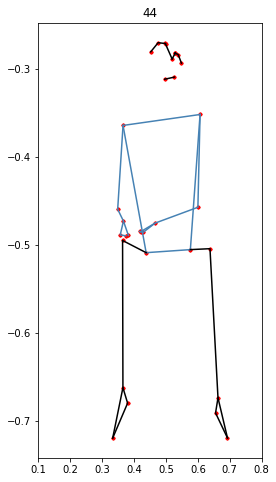

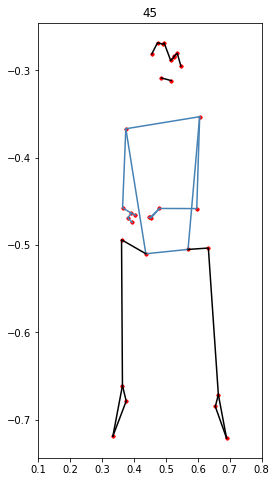

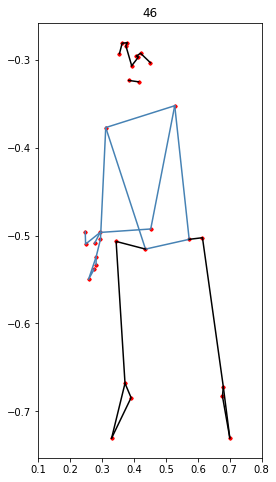

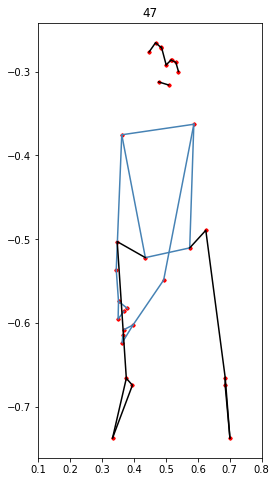

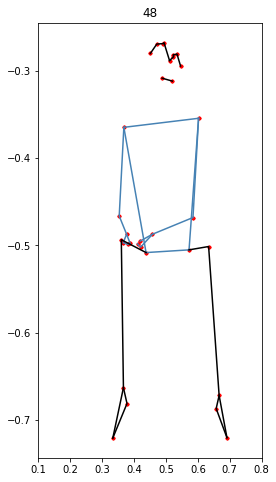

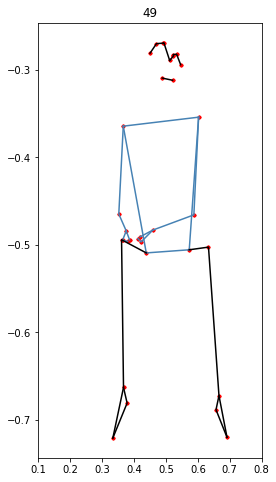

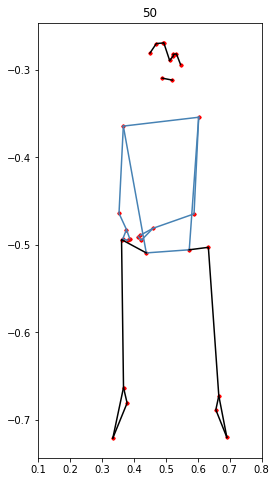

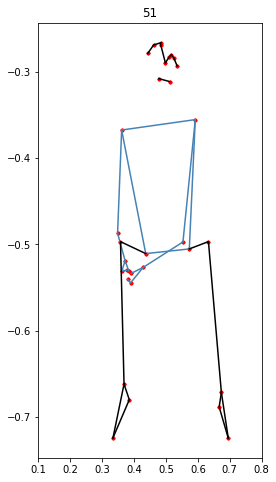

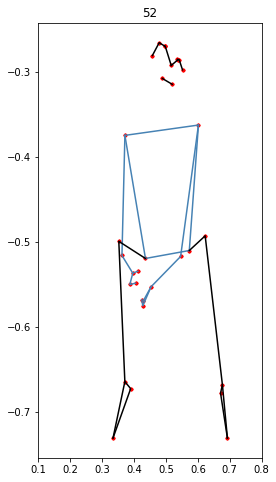

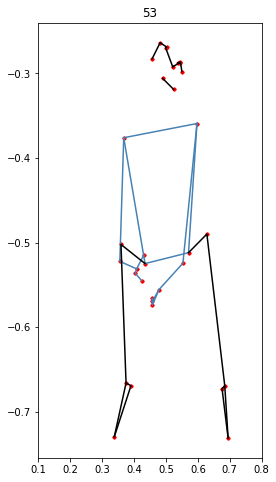

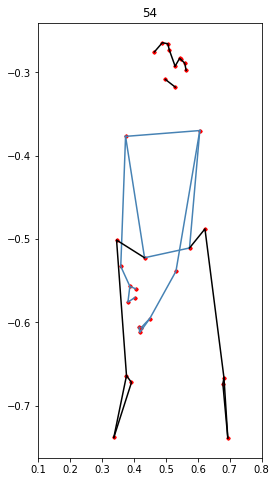

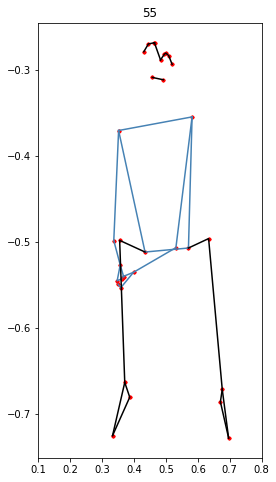

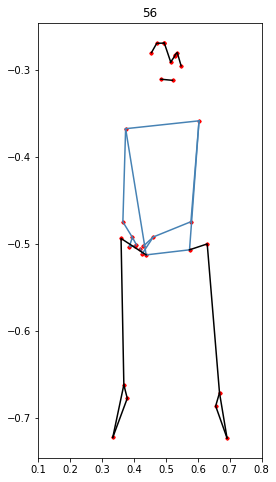

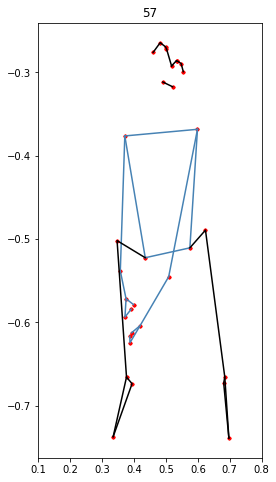

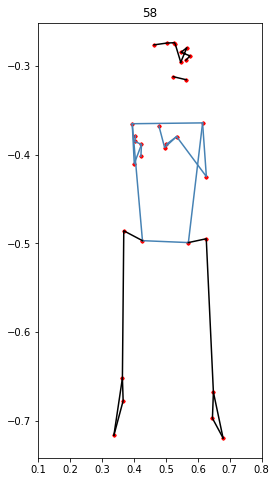

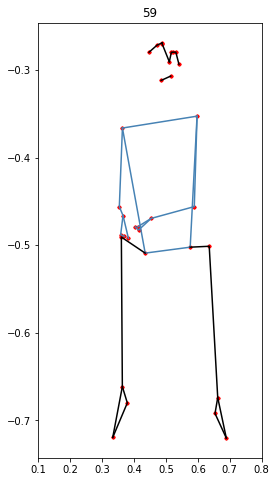

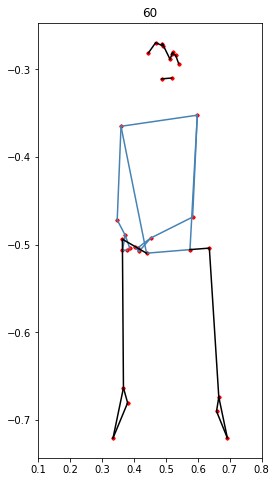

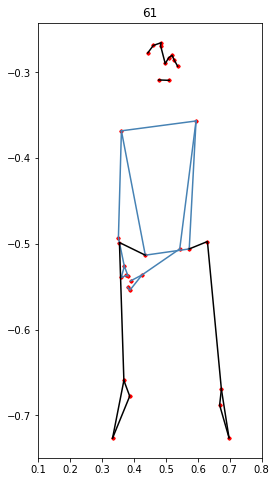

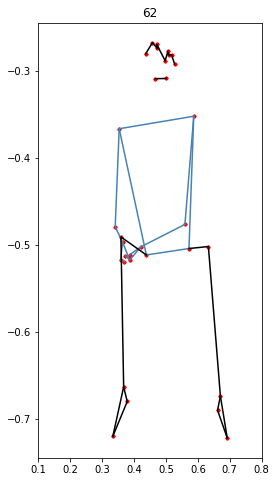

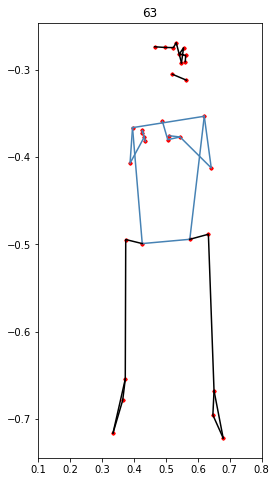

In [108]:
a = []
b = []
    
for i in range(len(df_vae_right)):
    df_x_vae = df_vae_right.filter(regex='_x').iloc[i, :]
    df_y_vae = df_vae_right.filter(regex='_y').iloc[i, :]
    df_z_vae = df_vae_right.filter(regex='_z').iloc[i, :]

    df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
    df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
    df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

    df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
    np.ndarray(df_x_y_vae)

    df_x_y_sum_vae = df_x_y_0 + df_x_y_vae
    
    #position=0
    df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
    df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

    df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
    df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

    df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
    df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

    df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

    df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
    df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

    df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

    fig = plt.figure(figsize=(4, 8))
    plt.xlim(0.1,0.8)
    #     #plt.ylim(1,0)
    
    plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
    plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

    plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

    plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
    plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

    plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
    plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

    plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
    plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
    plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

    plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

    plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
    plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

    plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
    plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot
    
    plt.title(i)
    
    a.append(df_x_y_sum_vae[0])
    b.append(-df_x_y_sum_vae[1])

    for j in range(df_x_y_sum_vae.shape[0]):
        plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
        #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)

In [109]:
x =[]
y=[]
xy=[]

for i in range(len(a)):
    x.append(a[i][16])
    y.append(b[i][16])
    xy = pd.DataFrame({'x':x, 'y':y })

<AxesSubplot:xlabel='x', ylabel='y'>

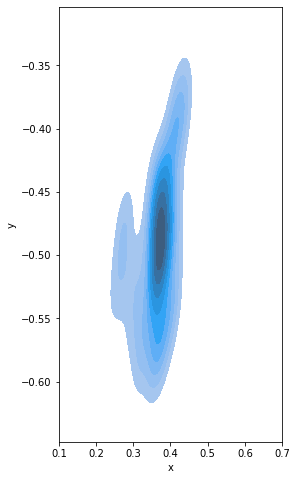

In [110]:
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html


fig = plt.figure(figsize=(4, 8))
plt.xlim(0.1, 0.7)
#plt.ylim(-0.8, -0.2)
sns.kdeplot(data=xy, x="x", y="y", fill=True)

## 운동량 증강 후(VAE) 그림

In [111]:
x_hand_1_vae = ([df_x_y_sum_vae.iloc[15:16,:1], df_x_y_sum_vae.iloc[21:22,:1]])
y_hand_1_vae = ([df_x_y_sum_vae.iloc[15:16,1:], df_x_y_sum_vae.iloc[21:22,1:]])

x_hand_1_min_vae = (x_hand_1_vae[0].values+x_hand_1_vae[1].values)/len(x_hand_1_vae)
y_hand_1_min_vae = (y_hand_1_vae[0].values+y_hand_1_vae[1].values)/len(y_hand_1_vae)

hand_1_min_vae = (x_hand_1_min_vae[0][0], y_hand_1_min_vae[0][0])
print('position 1 x좌표 평균: ', x_hand_1_min_vae, 'position 1 y좌표 평균: ', y_hand_1_min_vae)

print('position 0 좌표 평균: ', hand_0_min)
print('position 1 좌표 평균: ', hand_1_min_vae)

x_hand = (hand_0_min[0], hand_1_min_vae[0])
y_hand_vae = (-hand_0_min[1], -hand_1_min_vae[1])

print(x_hand, y_hand_vae)

position 1 x좌표 평균:  [[0.52673604]] position 1 y좌표 평균:  [[0.37646819]]
position 0 좌표 평균:  (0.5824175824175826, 0.325242718446602)
position 1 좌표 평균:  (0.5267360354175825, 0.37646818594660203)
(0.5824175824175826, 0.5267360354175825) (-0.325242718446602, -0.37646818594660203)


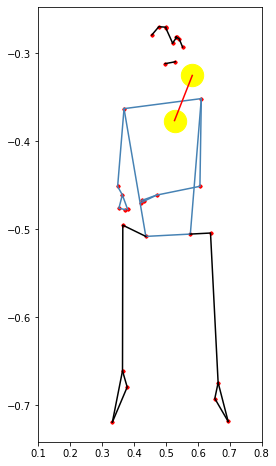

In [112]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0.1 ,0.8)

i=35
df_x_vae = df_vae_right.filter(regex='_x').iloc[i, :]
df_y_vae = df_vae_right.filter(regex='_y').iloc[i, :]
df_z_vae = df_vae_right.filter(regex='_z').iloc[i, :]

df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
np.ndarray(df_x_y_vae)

df_x_y_sum_vae = df_x_y_0 + df_x_y_vae

#position=0
df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot

for j in range(df_x_y_sum_vae.shape[0]):
    plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
plt.scatter(hand_1_min_vae[0], -hand_1_min_vae[1], color='yellow', s=500)
plt.plot(x_hand, y_hand_vae, color='red')
    
plt.show()

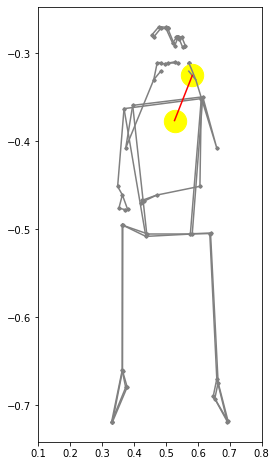

In [113]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0.1 ,0.8)

plt.plot(df_left_eyes_0.iloc[:,0], -df_left_eyes_0.iloc[:, 1], color='gray',zorder=2) #left eyes
plt.plot(df_right_eyes_0.iloc[:,0], -df_right_eyes_0.iloc[:, 1], color='gray',zorder=2) #right eyes

plt.plot(df_x_y_0.iloc[9:11,0], -df_x_y_0.iloc[9:11,1], color='gray',zorder=2) #mouth

plt.plot(df_left_hand_0.iloc[:,0], -df_left_hand_0.iloc[:,1], color='gray',zorder=2) #left hand
plt.plot(df_right_hand_0.iloc[:,0], -df_right_hand_0.iloc[:,1], color='gray',zorder=2) #right hand

plt.plot(df_left_arm_0.iloc[:,0], -df_left_arm_0.iloc[:,1], color='gray',zorder=2) #left arm
plt.plot(df_right_arm_0.iloc[:,0], -df_right_arm_0.iloc[:,1], color='gray',zorder=2) #right arm

plt.plot(df_x_y_0.iloc[11:13,0], -df_x_y_0.iloc[11:13,1], color='gray',zorder=2) #shoulder
plt.plot(df_left_shoulder_0.iloc[:,0], -df_left_shoulder_0.iloc[:,1], color='gray',zorder=2) #left shoulder
plt.plot(df_right_shoulder_0.iloc[:,0], -df_right_shoulder_0.iloc[:,1], color='gray',zorder=2) #right shoulder

plt.plot(df_x_y_0.iloc[23:25,0], -df_x_y_0.iloc[23:25,1], color='gray',zorder=2) #hip

plt.plot(df_left_leg_0.iloc[:,0], -df_left_leg_0.iloc[:,1], color='gray',zorder=2) #left leg
plt.plot(df_right_leg_0.iloc[:,0], -df_right_leg_0.iloc[:,1], color='gray',zorder=2) #right leg

plt.plot(df_left_foot_0.iloc[:,0], -df_left_foot_0.iloc[:,1], color='gray',zorder=2) #left foot
plt.plot(df_right_foot_0.iloc[:,0], -df_right_foot_0.iloc[:,1], color='gray',zorder=2) #right foot


for i in range(df_x_y_0.shape[0]):
    plt.scatter(df_x_y_0.iloc[:, 0], -df_x_y_0.iloc[:, 1], alpha=0.1, color='gray', s=7)
    
df_x_vae = df_vae_right.filter(regex='_x').iloc[35, :]
df_y_vae = df_vae_right.filter(regex='_y').iloc[35, :]
df_z_vae = df_vae_right.filter(regex='_z').iloc[35, :]

df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
np.ndarray(df_x_y_vae)

df_x_y_sum_vae = df_x_y_0 + df_x_y_vae

#position=0
df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='gray',zorder=2) #left eyes
plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='gray',zorder=2) #right eyes

plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='gray',zorder=2) #mouth

plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='gray',zorder=2) #left hand
plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='gray',zorder=2) #right hand

plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='gray',zorder=2) #left arm
plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='gray',zorder=2) #right arm

plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='gray',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='gray',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='gray',zorder=2) #right shoulder

plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='gray',zorder=2) #hip

plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='gray',zorder=2) #left leg
plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='gray',zorder=2) #right leg

plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='gray',zorder=2) #left foot
plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='gray',zorder=2) #right foot

for j in range(df_x_y_sum_vae.shape[0]):
    plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='gray', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
plt.scatter(hand_1_min_vae[0], -hand_1_min_vae[1], color='yellow', s=500)
plt.plot(x_hand, y_hand_vae, color='red')
    
plt.show()